In [ ]:
# Imports.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
import os
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#Load MNIST dataset.
(XTrain, YTrain), (XTest, YTest) = mnist.load_data()

print('XTrain class = ',type(XTrain))
print('YTrain class = ',type(YTrain))

# shape of our dataset.
print('XTrain shape = ',XTrain.shape)
print('XTest shape = ',XTest.shape)
print('YTrain shape = ',YTrain.shape)
print('YTest shape = ',YTest.shape)
# Number of distinct values of our MNIST target
print('YTrain values = ',np.unique(YTrain))
print('YTest values = ',np.unique(YTest))
# Distribution of classes in our dataset.
unique, counts = np.unique(YTrain, return_counts=True)
print('YTrain distribution = ',dict(zip(unique, counts)))
unique, counts = np.unique(YTest, return_counts=True)
print('YTest distribution = ',dict(zip(unique, counts)))

11501568/11490434 [==============================] - 0s 0us/step
XTrain class =  <class 'numpy.ndarray'>
YTrain class =  <class 'numpy.ndarray'>
XTrain shape =  (60000, 28, 28)
XTest shape =  (10000, 28, 28)
YTrain shape =  (60000,)
YTest shape =  (10000,)
YTrain values =  [0 1 2 3 4 5 6 7 8 9]
YTest values =  [0 1 2 3 4 5 6 7 8 9]
YTrain distribution =  {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}
YTest distribution =  {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


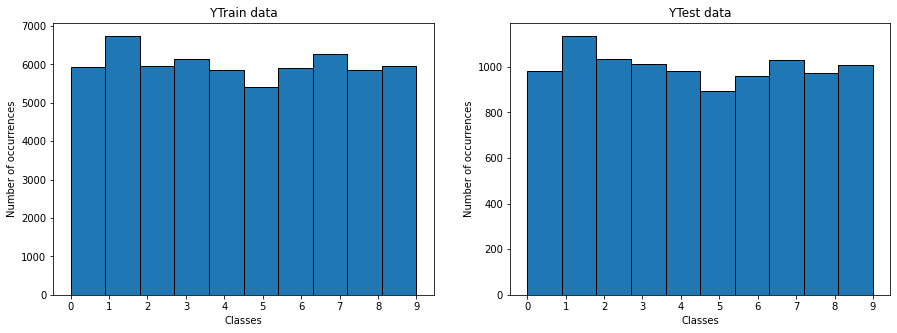

In [ ]:
# we plot an histogram distribution of our test and train data.
fig, axs = plt.subplots(1,2,figsize=(15,5)) 
axs[0].hist(YTrain, ec='black')
axs[0].set_title('YTrain data')
axs[0].set_xlabel('Classes') 
axs[0].set_ylabel('Number of occurrences')
axs[1].hist(YTest, ec='black')
axs[1].set_title('YTest data')
axs[1].set_xlabel('Classes') 
axs[1].set_ylabel('Number of occurrences')
# We want to show all ticks...
axs[0].set_xticks(np.arange(10))
axs[1].set_xticks(np.arange(10))

plt.show()


In [ ]:
# Data normalization.
XTrain = XTrain.astype('float32') / 255
XTest = XTest.astype('float32') / 255
# data reshapping.
XTrain = XTrain.reshape((len(XTrain), np.prod(XTrain.shape[1:])))
XTest = XTest.reshape((len(XTest), np.prod(XTest.shape[1:])))

print (XTrain.shape)
print (XTest.shape)

(60000, 784)
(10000, 784)


In [ ]:
InputModel = Input(shape=(784,))
EncodedLayer = Dense(64, activation='relu')(InputModel)
DecodedLayer = Dense(784, activation='sigmoid')(EncodedLayer)

AutoencoderModel = Model(InputModel, DecodedLayer)
# we can summarize our model.
AutoencoderModel.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_2 (Dense)             (None, 64)                50240     
                                                                 
 dense_3 (Dense)             (None, 784)               50960     
                                                                 
Total params: 101,200
Trainable params: 101,200
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Let's train the model using adadelta optimizer
AutoencoderModel.compile(optimizer='adadelta', loss='binary_crossentropy')

history = AutoencoderModel.fit(XTrain, XTrain,
                    batch_size=4,
                    epochs=10,
                    shuffle=True,
                    validation_data=(XTest, XTest))
# Make prediction to decode the digits
DecodedDigits = AutoencoderModel.predict(XTest)

Epoch 1/10
15000/15000 [==============================] - 36s 2ms/step - loss: 0.6845 - val_loss: 0.6698
Epoch 2/10
15000/15000 [==============================] - 34s 2ms/step - loss: 0.6332 - val_loss: 0.5767
Epoch 3/10
15000/15000 [==============================] - 34s 2ms/step - loss: 0.4978 - val_loss: 0.4166
Epoch 4/10
15000/15000 [==============================] - 35s 2ms/step - loss: 0.3685 - val_loss: 0.3303
Epoch 5/10
15000/15000 [==============================] - 34s 2ms/step - loss: 0.3153 - val_loss: 0.3016
Epoch 6/10
15000/15000 [==============================] - 35s 2ms/step - loss: 0.2966 - val_loss: 0.2903
Epoch 7/10
15000/15000 [==============================] - 34s 2ms/step - loss: 0.2883 - val_loss: 0.2845
Epoch 8/10
15000/15000 [==============================] - 33s 2ms/step - loss: 0.2837 - val_loss: 0.2809
Epoch 9/10
15000/15000 [==============================] - 33s 2ms/step - loss: 0.2807 - val_loss: 0.2784
Epoch 10/10
15000/15000 [==============================

dict_keys(['loss', 'val_loss'])


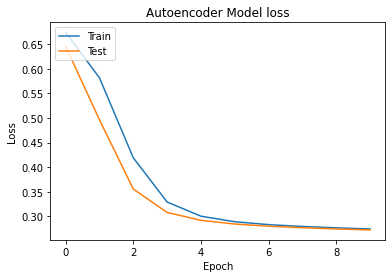

In [ ]:
def plotmodelhistory(history): 
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Autoencoder Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()
# list all data in history
print(history.history.keys())
# visualization of the loss minimization during the training process
plotmodelhistory(history)

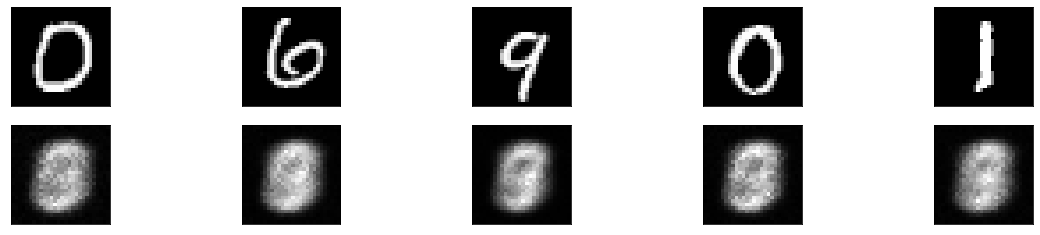

In [ ]:
n=5
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    # input image
    plt.imshow(XTest[i+10].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax = plt.subplot(2, n, i + 1 + n)
    # Image decoded by our Auto-encoder
    plt.imshow(DecodedDigits[i+10].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()